In [1]:
import pandas as pd

# Read the CSV file into a dataframe
df = pd.read_csv('train.csv')

# Display the dataframe
df


/var/folders/gz/v41bjfr12sj08j2gtqns7n580000gn/T/ipykernel_4468/1770211807.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
submission = pd.read_csv("gender_submission.csv")


In [3]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [5]:
import random
np.random.seed(0)
random.seed(0)

In [6]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [7]:
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',50)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
test_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
train_df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [13]:
train_df["Embarked"].value_counts()  #登船地点

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [14]:
train_df["Cabin"].value_counts() #客室番号


Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [15]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
plt.style.use("ggplot")

In [19]:
train_df[["Embarked","Survived","PassengerId"]].dropna()

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [20]:
train_df[["Embarked","Survived","PassengerId"]].dropna().groupby(["Embarked","Survived"]).count() #抽出→nullを除外→グループ化→カウントなんだねえ

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

In [21]:
embarked_df = train_df[["Embarked","Survived","PassengerId"]].dropna().groupby(["Embarked","Survived"]).count().unstack()

In [22]:
embarked_df

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

<Axes: xlabel='Embarked'>

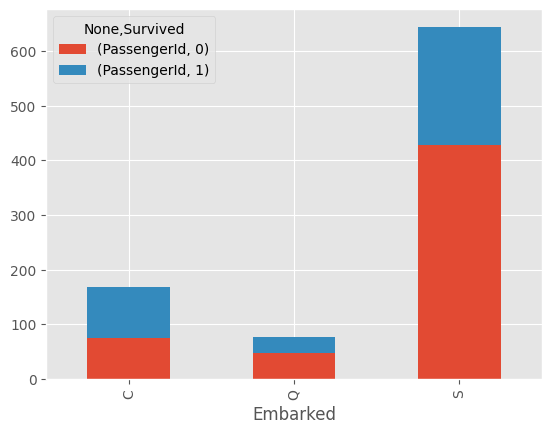

In [23]:
embarked_df.plot.bar(stacked = True)

In [24]:
embarked_df["survived_rate"] = embarked_df.iloc[:,0] / (embarked_df.iloc[:,0] + embarked_df.iloc[:,1])

In [25]:
embarked_df

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.446429
Q                 47   30      0.610390
S                427  217      0.663043

In [26]:
sex_df = train_df[["Sex","Survived","PassengerId"]].dropna().groupby(["Sex","Survived"]).count().unstack()

In [27]:
sex_df

PassengerId     
Survived           0    1
Sex                      
female            81  233
male             468  109

<Axes: xlabel='Sex'>

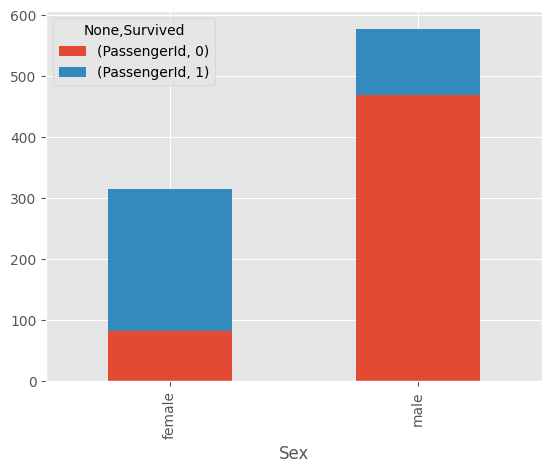

In [28]:
sex_df.plot.bar(stacked = True)


In [29]:
ticket_df = train_df[["Pclass","Survived","PassengerId"]].dropna().groupby(["Pclass","Survived"]).count().unstack()

<Axes: xlabel='Pclass'>

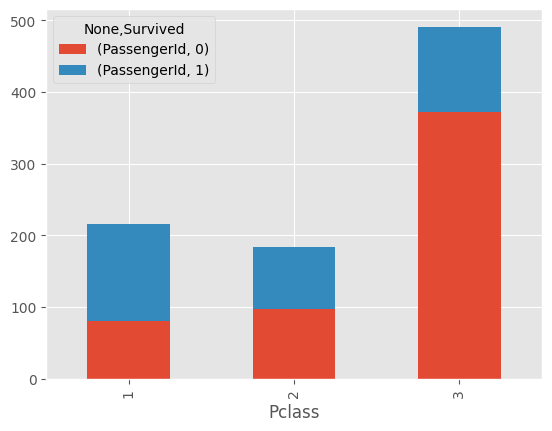

In [30]:
ticket_df.plot.bar(stacked = True)

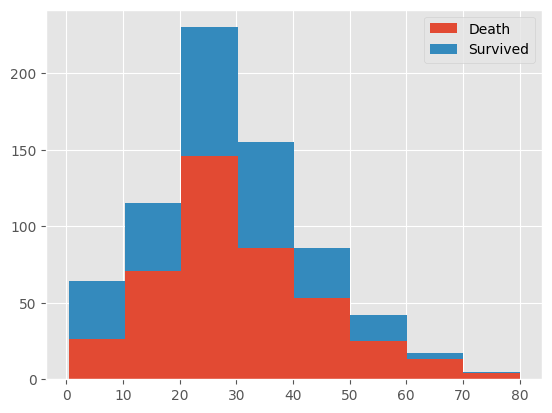

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Extracting age data for passengers who survived and who didn't
survived_age = train_df[train_df["Survived"] == 1]["Age"].dropna().values

not_survived_age = train_df[train_df["Survived"] == 0]["Age"].dropna().values

# Plotting histogram
plt.hist([not_survived_age, survived_age], histtype="barstacked", bins=8, label=["Death", "Survived"])
plt.legend()


plt.show()


In [32]:
survived_age = train_df[train_df["Survived"]==1]["Age"].dropna().values
not_survived_age = train_df[train_df["Survived"] == 0]["Age"].dropna().values

In [33]:
survived_age.shape

(290,)

In [34]:
not_survived_age.shape

(424,)

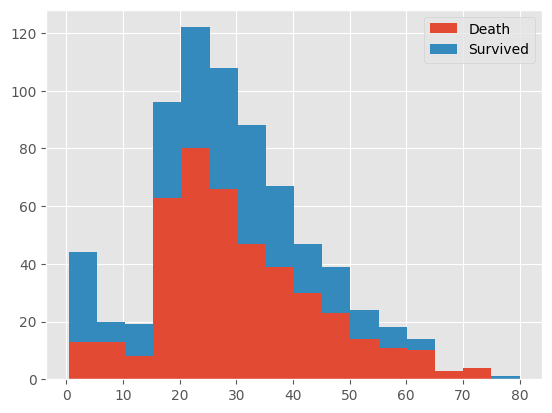

In [35]:
# Plotting histogram
plt.hist([not_survived_age, survived_age], histtype="barstacked", bins=16, label=["Death", "Survived"])
plt.legend()


plt.show()


In [36]:
train_df_corr = pd.get_dummies(train_df,columns = ["Sex"],drop_first = True)
train_df_corr 

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,False
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,True


In [37]:
train_df_corr = pd.get_dummies(train_df_corr,columns = ["Embarked"])

In [38]:
train_df_corr.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,False,True


In [39]:
# 数値列のみを含むDataFrameを作成する
numeric_df = train_df_corr.select_dtypes(include=['float64', 'int64',"bool"])

# 相関係数を計算する
train_corr = numeric_df.corr()
train_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.166603
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.496624


<Axes: >

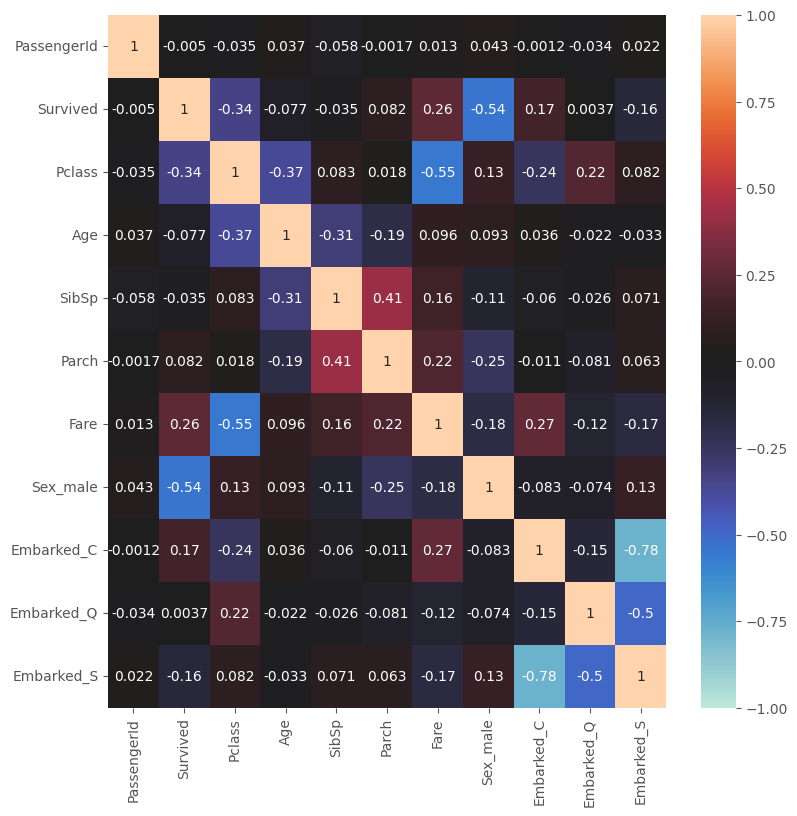

In [40]:
plt.figure(figsize = (9,9))
sns.heatmap(train_corr,vmax = 1,vmin = -1,center = 0,annot = True)

# データの前処理　


In [41]:
all_df = pd.concat([train_df,test_df],sort = False).reset_index(drop=True)

In [42]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [43]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [44]:
Fare_mean = all_df[["Pclass","Fare"]].groupby("Pclass").mean().reset_index()#Pclassごとの平均値を取得

In [45]:
Fare_mean.columns = ["Pclass","Fare_mean"]

In [46]:
Fare_mean

,Pclass,Fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [47]:
all_df = pd.merge(all_df,Fare_mean,on = "Pclass",how = "left")
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_mean
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,13.302889
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,87.508992
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,13.302889
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,87.508992
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,13.302889
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,13.302889
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,87.508992
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,13.302889
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,13.302889


In [48]:
all_df["Fare_mean"]

0       13.302889
1       87.508992
2       13.302889
3       87.508992
4       13.302889
          ...    
1304    13.302889
1305    87.508992
1306    13.302889
1307    13.302889
1308    13.302889
Name: Fare_mean, Length: 1309, dtype: float64

In [49]:
all_df.loc[(all_df["Fare"].isnull()),"Fare"] = all_df["Fare_mean"]# Fareがnullの行のFare_meanを代入 locは置き換える行を指定 all_df.loc[行, 列]
all_df = all_df.drop("Fare_mean",axis=1) #axis = 1は列を指定して削除

In [50]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [51]:
all_df["Name"].head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [52]:
name_df = all_df["Name"].str.split("[,.]",expand = True)
name_df.columns = ["family_name","honorific","name","none"]
name_df = name_df.drop("none",axis = 1)
name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [53]:
name_df["family_name"]= name_df["family_name"].str.strip()
name_df["honorific"]= name_df["honorific"].str.strip()
name_df["name"]= name_df["name"].str.strip()
name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [54]:
name_df["honorific"].value_counts()

honorific
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [55]:
all_df = pd.concat([all_df,name_df],axis = 1)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


<Axes: xlabel='honorific', ylabel='Age'>

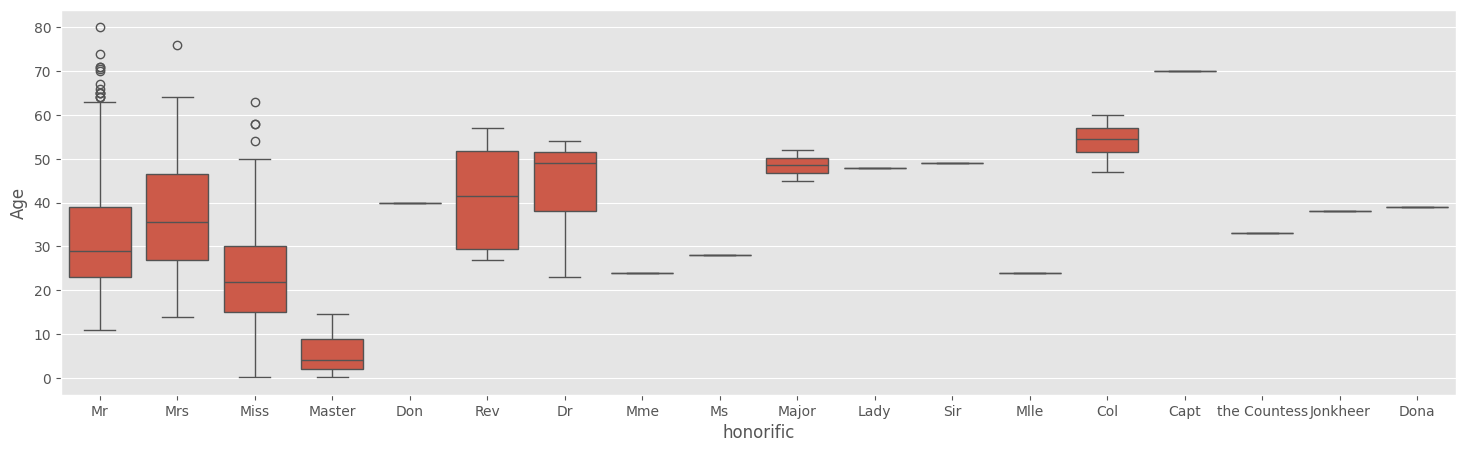

In [56]:
plt.figure(figsize = (18,5))
sns.boxplot(x = "honorific",y = "Age",data = all_df)

In [57]:
all_df[["Age","honorific"]].groupby("honorific").mean()

,Age
honorific,
Capt,70.000000
Col,54.000000
Don,40.000000
Dona,39.000000
Dr,43.571429
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,5.482642


In [58]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df = pd.concat([train_df,name_df[0:len(train_df)].reset_index(drop = True)],axis = 1) #敬称によって
test_df = pd.concat([test_df,name_df[len(train_df):].reset_index(drop  =  True)],axis = 1)#これは何をしているの？っ→

In [59]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,Rev,Juozas
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss,Margaret Edith
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,Miss,"Catherine Helen ""Carrie"""
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,Mr,Karl Howell


In [60]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Kelly,Mr,James
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Wilkes,Mrs,James (Ellen Needs)
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Myles,Mr,Thomas Francis
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Wirz,Mr,Albert
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Hirvonen,Mrs,Alexander (Helga E Lindqvist)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


<Axes: xlabel='honorific'>

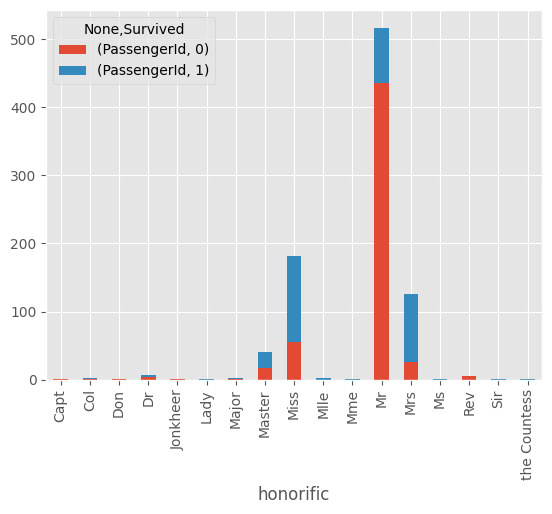

In [61]:
honorific_df = train_df[["honorific","Survived","PassengerId"]].dropna().groupby(["honorific","Survived"]).count().unstack()
#honorific_df = train_df[["honorific", "Survived", "PassengerId"]].dropna().groupby(["honorific"]).count().unstack()
honorific_df.plot.bar(stacked = True)

In [62]:
honorific_age_mean = all_df[["honorific","Age"]].groupby("honorific").mean().reset_index()
honorific_age_mean

,honorific,Age
0,Capt,70.000000
1,Col,54.000000
2,Don,40.000000
3,Dona,39.000000
4,Dr,43.571429
5,Jonkheer,38.000000
6,Lady,48.000000
7,Major,48.500000
8,Master,5.482642
9,Miss,21.774238


In [63]:
all_df = pd.concat([train_df,test_df],sort = False).reset_index(drop=True)

In [64]:
all_df = pd.merge(all_df,honorific_age_mean, on = "honorific",how = "left")



In [65]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name,Age_y
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,32.252151
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),36.994118
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,21.774238
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),36.994118
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,32.252151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf,32.252151
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina,39.000000
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen,32.252151
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick,32.252151


In [66]:
all_df.loc[(all_df["Age_x"].isnull()),"Age_x"] = all_df["Age_y"]# Ageがnullの行のAge_yを代入


In [67]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name,Age_y
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,32.252151
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),36.994118
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,21.774238
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),36.994118
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,32.252151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf,32.252151
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina,39.000000
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen,32.252151
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick,32.252151


In [68]:
all_df = all_df.drop("Age_y",axis = 1)

In [69]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


In [70]:
all_df["family_num"] = all_df["Parch"] + all_df["SibSp"]

In [71]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name,family_num
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf,0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen,0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick,0


In [72]:
all_df["family_num"].value_counts()

family_num
0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: count, dtype: int64

In [73]:
all_df.loc[all_df["family_num"] == 0, "alone"] = 1
all_df["alone"].fillna(0,inplace = True)

/var/folders/gz/v41bjfr12sj08j2gtqns7n580000gn/T/ipykernel_4468/1633793660.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df["alone"].fillna(0,inplace = True)


In [74]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name,family_num,alone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,1,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),1,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,0,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),1,0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf,0,1.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina,0,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen,0,1.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick,0,1.0


In [75]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name,family_num,alone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,1,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),1,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,0,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),1,0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,0,1.0


In [76]:
all_df = all_df.drop(["PassengerId","Name","family_name","name","Ticket","Cabin"],axis = 1)

In [77]:
all_df.head()

,Survived,Pclass,Sex,Age_x,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


# objectクラスを数値にする

In [78]:
categories = all_df.columns[all_df.dtypes == "object"]
categories

Index(['Sex', 'Embarked', 'honorific'], dtype='object')

In [79]:
all_df.loc[~((all_df["honorific"]== "Mr")|(all_df["honorific"]== "Miss")|(all_df["honorific"]== "Mrs")|(all_df["honorific"]== "Master")),"honorific"] = "other" #~はnotの意味 mr,miss,mrs,master以外はotherにする


In [80]:
all_df.honorific.value_counts()

honorific
Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: count, dtype: int64

In [81]:
!pip install scikit-learn

In [82]:
from sklearn.preprocessing  import LabelEncoder


In [83]:
all_df["Embarked"].fillna("missing",inplace = True)

/var/folders/gz/v41bjfr12sj08j2gtqns7n580000gn/T/ipykernel_4468/446746550.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df["Embarked"].fillna("missing",inplace = True)


In [84]:
all_df.head()

,Survived,Pclass,Sex,Age_x,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


In [85]:
le = LabelEncoder()
le = le.fit(all_df["Sex"])
all_df["Sex"] = le.transform(all_df["Sex"])


In [86]:
all_df.head()

,Survived,Pclass,Sex,Age_x,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,1,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,0,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,0,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,0,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,1,35.0,0,0,8.0500,S,Mr,0,1.0


In [87]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    if all_df[cat].dtypes =="object":
        le = le.fit(all_df[cat])
        all_df[cat] = le.transform(all_df[cat])
        

Sex
Embarked
honorific


In [88]:
all_df.head()

,Survived,Pclass,Sex,Age_x,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,1,22.0,1,0,7.2500,2,2,1,0.0
1,1.0,1,0,38.0,1,0,71.2833,0,3,1,0.0
2,1.0,3,0,26.0,0,0,7.9250,2,1,0,1.0
3,1.0,1,0,35.0,1,0,53.1000,2,3,1,0.0
4,0.0,3,1,35.0,0,0,8.0500,2,2,0,1.0


In [89]:
train_X = all_df[~all_df["Survived"].isnull()].drop("Survived",axis = 1).reset_index(drop = True)
train_Y = train_df["Survived"]

In [90]:
train_X.head()

,Pclass,Sex,Age_x,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,3,1,22.0,1,0,7.2500,2,2,1,0.0
1,1,0,38.0,1,0,71.2833,0,3,1,0.0
2,3,0,26.0,0,0,7.9250,2,1,0,1.0
3,1,0,35.0,1,0,53.1000,2,3,1,0.0
4,3,1,35.0,0,0,8.0500,2,2,0,1.0


In [91]:
train_Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [92]:
test_X = all_df[all_df["Survived"].isnull()].drop("Survived",axis = 1).reset_index(drop = True)

In [93]:
test_X.head()

,Pclass,Sex,Age_x,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,3,1,34.5,0,0,7.8292,1,2,0,1.0
1,3,0,47.0,1,0,7.0000,2,3,1,0.0
2,2,1,62.0,0,0,9.6875,1,2,0,1.0
3,3,1,27.0,0,0,8.6625,2,2,0,1.0
4,3,0,22.0,1,1,12.2875,2,3,2,0.0


In [94]:
!pip install lightgbm

In [95]:
import lightgbm as lgb


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

X_train, X_valid, y_train, y_valid = train_test_split(train_X,train_Y,test_size = 0.2)


In [97]:
categories = ["Embarked","Pclass","Sex","honorific","alone"]


In [98]:
lgb_train = lgb.Dataset(X_train,y_train,categorical_feature = categories) #lgb_trainは何をしているの？→データセットを作成している
lgb_eval = lgb.Dataset(X_valid,y_valid,categorical_feature = categories,reference = lgb_train)#lgb_evalは何をしている?→


In [99]:
type(lgb_train)

lightgbm.basic.Dataset

In [100]:
lgbm_params = {
    "objective":"binary",#binary やregression,multiclassなどがある
    "random_seed":1234
}



In [101]:
model_lgb = lgb.train(lgbm_params,
                      lgb_train,
                      valid_sets = lgb_eval,
                      num_boost_round= 100,
                      callbacks=[
                        lgb.early_stopping(stopping_rounds=20, verbose=True),
                        lgb.log_evaluation(100),
                ],
                      )

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [102]:
model_lgb.feature_importance()

array([ 51,  25, 392,  24,  13, 438,  50,  18,  38,   7], dtype=int32)

<Axes: >

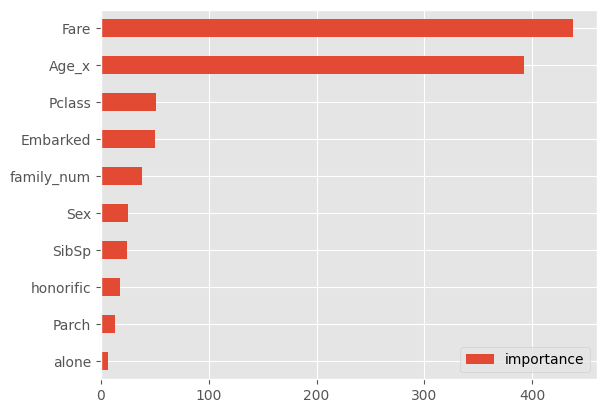

In [103]:
importance = pd.DataFrame(model_lgb.feature_importance(),index = X_train.columns,columns = ["importance"]).sort_values(by = "importance",ascending =True)
importance.plot.barh()

In [104]:
y_pred = model_lgb.predict(X_valid,num_iteration = model_lgb.best_iteration)

In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid,np.round(y_pred))

0.8491620111731844

# ここまではよし　こっから精度を改善していく

In [106]:
lgbm_params = {
    "objective":"binary",#binary やregression,multiclassなどがある
    "max_bin":331,
    "nim_leaves":20,
    "min_data_in_leaf":57,
    "random_seed":1234
}


In [107]:
lgb_train = lgb.Dataset(X_train,y_train,categorical_feature = categories) #lgb_trainは何をしているの？→データセットを作成している
lgb_eval = lgb.Dataset(X_valid,y_valid,categorical_feature = categories,reference = lgb_train)#lgb_evalは何をしている?→
model_lgb = lgb.train(lgbm_params,
                      lgb_train,
                      valid_sets = lgb_eval,
                      num_boost_round= 100,
                      callbacks=[
                        lgb.early_stopping(stopping_rounds=20, verbose=True),
                        lgb.log_evaluation(100),
                ],
                      )

[LightGBM] [Warning] Unknown parameter: nim_leaves
[LightGBM] [Warning] Unknown parameter: nim_leaves
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Warning] Unknown parameter: nim_leaves
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [108]:
y_pred = model_lgb.predict(X_valid,num_iteration = model_lgb.best_iteration)

In [109]:
accuracy_score(y_valid,np.round(y_pred))

0.8324022346368715

In [110]:
folds = 3
kf = KFold(n_splits = folds)
models = []
accuracy = []
for train_index,val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    lgb_train = lgb.Dataset(X_train,y_train,categorical_feature = categories)
    lgb_eval = lgb.Dataset(X_valid,y_valid,categorical_feature = categories,reference = lgb_train)

    model_lgb = lgb.train(lgbm_params,
                      lgb_train,
                      valid_sets = lgb_eval,
                      num_boost_round= 100,
                      callbacks=[
                        lgb.early_stopping(stopping_rounds=20, verbose=True),
                        lgb.log_evaluation(100),
                ],
                      )
    y_pred = model_lgb.predict(X_valid,num_iteration = model_lgb.best_iteration)

    print(accuracy_score(y_valid,np.round(y_pred)))
    accuracy.append(accuracy_score(y_valid,np.round(y_pred)))

    models.append(model_lgb)


[LightGBM] [Warning] Unknown parameter: nim_leaves
[LightGBM] [Warning] Unknown parameter: nim_leaves
[LightGBM] [Info] Number of positive: 236, number of negative: 358
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 594, number of used features: 10
[LightGBM] [Warning] Unknown parameter: nim_leaves
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397306 -> initscore=-0.416701
[LightGBM] [Info] Start training from score -0.416701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [111]:
accuracy

[0.8181818181818182, 0.8114478114478114, 0.835016835016835]

In [112]:
preds =[]
for models in models:
    pred = models.predict(test_X)
    preds.append(pred)


In [113]:
preds_array = np.array(preds)
preds_mean = np.mean(preds_array,axis = 0) # axis = 0は列方向に平均を取る axis = 1は行方向に平均を取る



In [114]:
preds_mean.shape

(418,)

In [115]:
preds_int = (preds_mean > 0.5).astype(int)

In [116]:
preds_int

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [117]:
submission["Survived"] = preds_int

In [118]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [119]:
!mkdir ./submit

mkdir: ./submit: File exists


In [120]:
submission.to_csv("./submit/titanic_submit01.csv",index = False) # index = Falseでindexを出力しない

# ここからは精度以外の分析をおこなっていく。

In [121]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

all_df = pd.concat([train_df,test_df],sort = False).reset_index(drop = True) # drop = Trueで元のindexを削除


In [122]:
all_df.Pclass.value_counts()

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

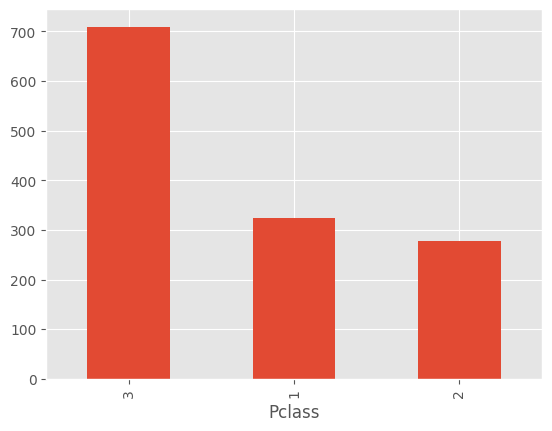

In [123]:
all_df.Pclass.value_counts().plot.bar()

In [126]:
all_df[["Pclass","Fare"]].groupby("Pclass").describe()

Fare                                                                 
        count       mean        std  min      25%      50%       75%       max
Pclass                                                                        
1       323.0  87.508992  80.447178  0.0  30.6958  60.0000  107.6625  512.3292
2       277.0  21.179196  13.607122  0.0  13.0000  15.0458   26.0000   73.5000
3       708.0  13.302889  11.494358  0.0   7.7500   8.0500   15.2458   69.5500

<Axes: xlabel='Pclass', ylabel='Fare'>

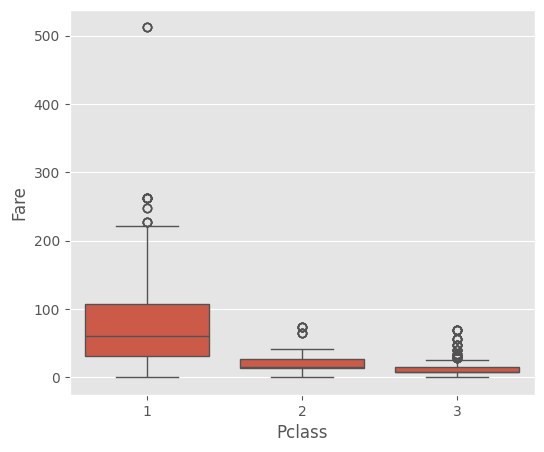

In [128]:
plt.figure(figsize = (6,5))
sns.boxplot(x = "Pclass", y = "Fare",data = all_df)

In [129]:
all_df["Pclass2"] = all_df["Pclass"]

In [130]:
all_df.loc[all_df["Fare"]>108, "Pclass2"] = 0

In [131]:
all_df[all_df["Pclass2"]==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass2
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,0
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,0
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,0
118,119,0.0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,0
195,196,1.0,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1263,NaN,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,134.5000,E39 E41,C,0
1266,1267,NaN,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.3750,NaN,C,0
1291,1292,NaN,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S,0
1298,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,0


In [132]:
all_df[["Pclass2","Age"]].groupby("Pclass2").describe()

Age                                                     
         count       mean        std   min   25%   50%    75%   max
Pclass2                                                            
0         76.0  35.242368  15.422162  0.92  24.0  35.0  45.50  67.0
1        208.0  40.591346  13.981486  4.00  30.0  40.5  50.25  80.0
2        261.0  29.506705  13.638627  0.67  22.0  29.0  36.00  70.0
3        501.0  24.816367  11.958202  0.17  18.0  24.0  32.00  74.0

<Axes: xlabel='Pclass2', ylabel='Age'>

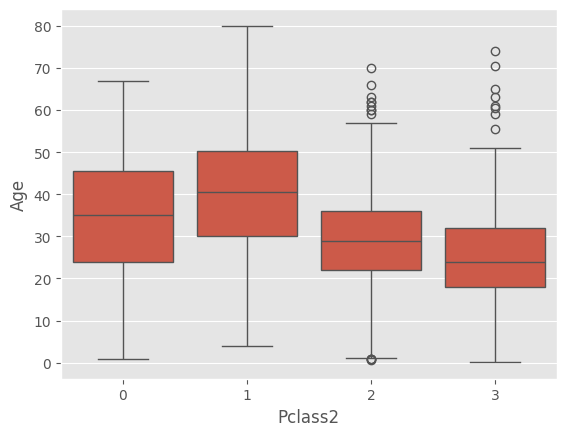

In [133]:
sns.boxplot(x = "Pclass2",y = "Age",data = all_df)

In [134]:
all_df[all_df["Age"]>15][["Pclass2","Age"]].groupby("Pclass2").describe()


Age                                                    
         count       mean        std   min   25%   50%   75%   max
Pclass2                                                           
0         69.0  37.920290  13.428357  17.0  27.0  36.0  48.0  67.0
1        207.0  40.768116  13.780416  16.0  30.0  41.0  50.5  80.0
2        233.0  32.369099  11.363367  16.0  24.0  30.0  39.0  70.0
3        422.0  28.200237   9.634512  16.0  21.0  26.0  33.0  74.0

<Axes: xlabel='Pclass2', ylabel='Age'>

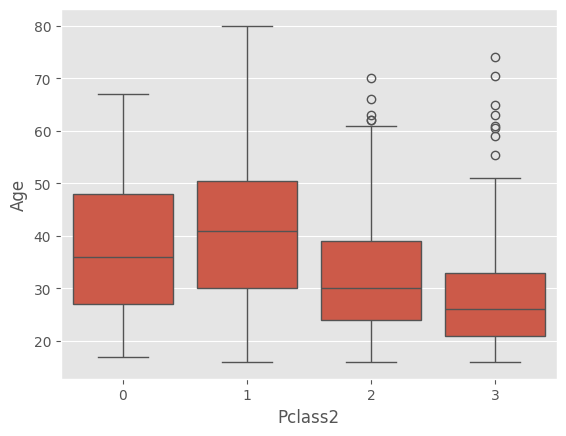

In [135]:
sns.boxplot(x = "Pclass2",y = "Age",data = all_df[all_df["Age"]>15])

<Axes: xlabel='Age', ylabel='Fare'>

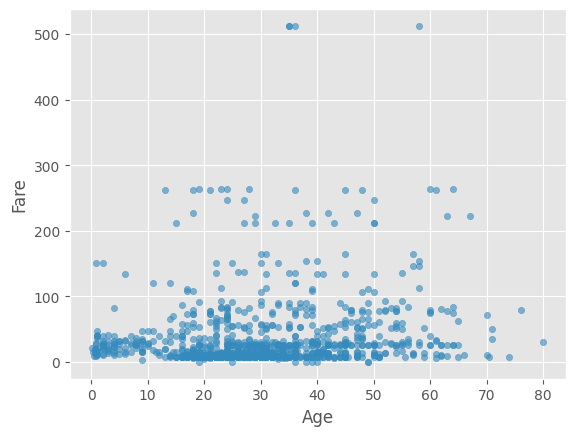

In [139]:
all_df.plot.scatter(x = "Age", y = "Fare", alpha = 0.6)

In [140]:
all_df["family_num"] = all_df["SibSp"] + all_df["Parch"]

In [141]:
all_df[["Pclass2","family_num"]].groupby("Pclass2").describe()

family_num                                              
             count      mean       std  min  25%  50%  75%   max
Pclass2                                                         
0             81.0  1.543210  1.541504  0.0  0.0  1.0  2.0   5.0
1            242.0  0.553719  0.687172  0.0  0.0  0.0  1.0   3.0
2            277.0  0.761733  1.029060  0.0  0.0  0.0  1.0   5.0
3            709.0  0.968970  1.921230  0.0  0.0  0.0  1.0  10.0

<Axes: xlabel='Pclass2', ylabel='family_num'>

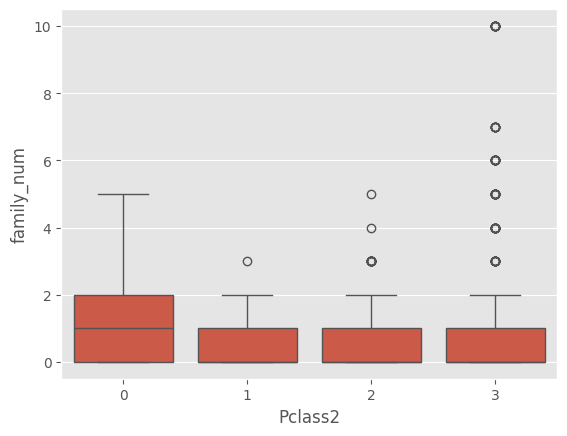

In [142]:
sns.boxplot(x = "Pclass2", y = "family_num",data = all_df)

In [143]:
Pclass_gender_df = all_df[["Pclass2","Sex","PassengerId"]].groupby(["Pclass2","Sex"]).count().unstack()

In [144]:
Pclass_gender_df

PassengerId     
Sex          female male
Pclass2                 
0                51   30
1                93  149
2               106  171
3               216  493

<Axes: xlabel='Pclass2'>

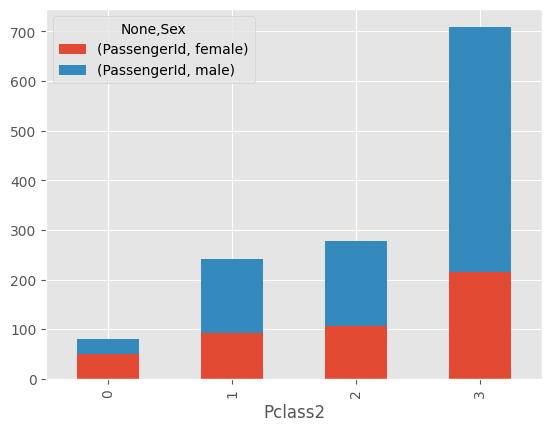

In [145]:
Pclass_gender_df.plot.bar(stacked = True)

In [147]:
Pclass_gender_df["male_ratio"]= Pclass_gender_df["PassengerId","male"]/(Pclass_gender_df["PassengerId","male"]+Pclass_gender_df["PassengerId","female"])

In [148]:
Pclass_gender_df

PassengerId      male_ratio
Sex          female male           
Pclass2                            
0                51   30   0.370370
1                93  149   0.615702
2               106  171   0.617329
3               216  493   0.695346

In [166]:
Pclass_emb_df = all_df[["Pclass2","Embarked","PassengerId"]].dropna().groupby(["Pclass2","Embarked"]).count().unstack()

In [168]:
Pclass_emb_df = Pclass_emb_df.fillna(0)

<Axes: xlabel='Pclass2'>

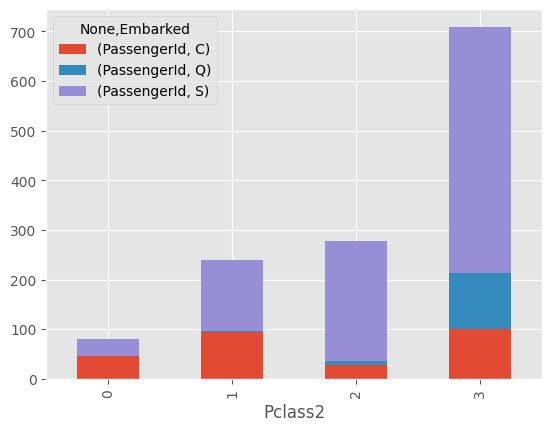

In [169]:
Pclass_emb_df.plot.bar(stacked = True)

In [170]:
Pclass_emb_df

PassengerId              
Embarked           C      Q      S
Pclass2                           
0               47.0    0.0   34.0
1               94.0    3.0  143.0
2               28.0    7.0  242.0
3              101.0  113.0  495.0

In [171]:
Pclass_emb_df_ratio = Pclass_emb_df.copy()
Pclass_emb_df_ratio["Sum"] = Pclass_emb_df_ratio["PassengerId","C"] + Pclass_emb_df_ratio["PassengerId","Q"] + Pclass_emb_df_ratio["PassengerId","S"]
Pclass_emb_df_ratio["PassengerId","C"] = Pclass_emb_df_ratio["PassengerId","C"] / Pclass_emb_df_ratio["Sum"]
Pclass_emb_df_ratio["PassengerId","Q"] = Pclass_emb_df_ratio["PassengerId","Q"] / Pclass_emb_df_ratio["Sum"]
Pclass_emb_df_ratio["PassengerId","S"] = Pclass_emb_df_ratio["PassengerId","S"] / Pclass_emb_df_ratio["Sum"]
Pclass_emb_df_ratio = Pclass_emb_df_ratio.drop("Sum",axis = 1)

In [172]:
Pclass_emb_df_ratio

PassengerId                    
Embarked           C         Q         S
Pclass2                                 
0           0.580247  0.000000  0.419753
1           0.391667  0.012500  0.595833
2           0.101083  0.025271  0.873646
3           0.142454  0.159379  0.698166

<Axes: xlabel='Pclass2'>

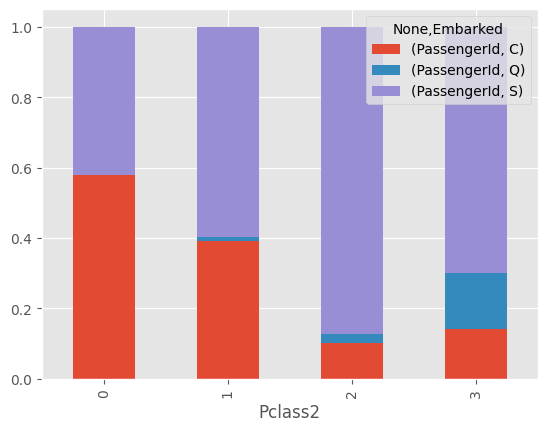

In [173]:
Pclass_emb_df_ratio.plot.bar(stacked = True)

In [174]:
C_young10 = all_df[(all_df["Embarked"]=="C")&(all_df["Age"]//10 == 1)&(all_df["family_num"]==0)]

In [175]:
C_young20 = all_df[(all_df["Embarked"]=="C")&(all_df["Age"]//10 == 2)&(all_df["family_num"]==0)]

In [176]:
len(C_young10)

7

In [177]:
len(C_young20)

31

In [178]:
C_young20

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass2,family_num
57,58,0.0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C,3,0
60,61,0.0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C,3,0
135,136,0.0,2,"Richard, Mr. Emile",male,23.0,0,0,SC/PARIS 2133,15.0458,NaN,C,2,0
139,140,0.0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C,1,0
207,208,1.0,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C,3,0
296,297,0.0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,7.2292,NaN,C,3,0
310,311,1.0,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C,1,0
369,370,1.0,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,1,0
373,374,0.0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,NaN,C,0,0
378,379,0.0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C,3,0


<Axes: xlabel='Age', ylabel='Fare'>

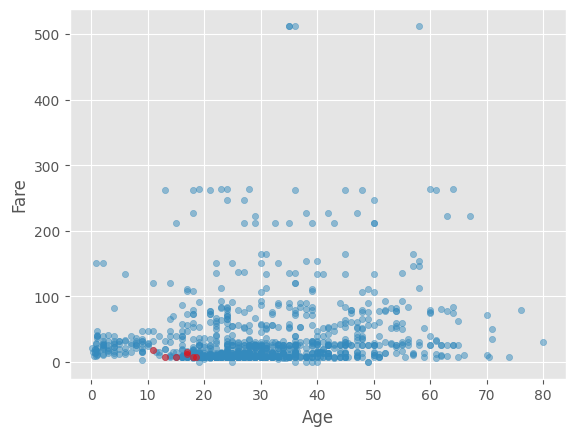

In [179]:
ax = all_df.plot.scatter(x = "Age", y = "Fare", alpha = 0.5)
C_young10.plot.scatter(x = "Age", y = "Fare", color = "red",alpha = 0.5, ax = ax)

<Axes: xlabel='Age', ylabel='Fare'>

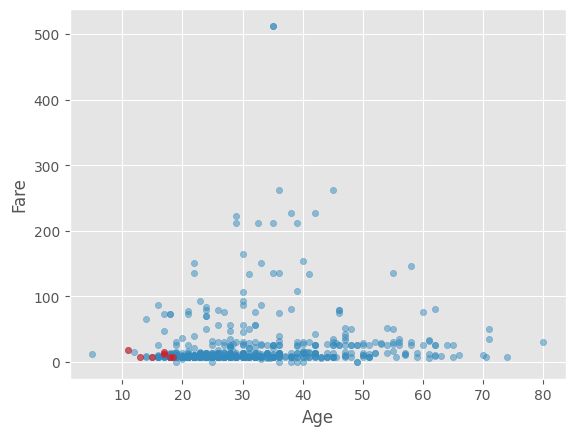

In [180]:
ax = all_df[all_df["family_num"]==0].plot.scatter(x = "Age", y = "Fare", alpha = 0.5)
C_young10.plot.scatter(x = "Age", y = "Fare", color = "red",alpha = 0.5, ax = ax)

<Axes: xlabel='Age', ylabel='Fare'>

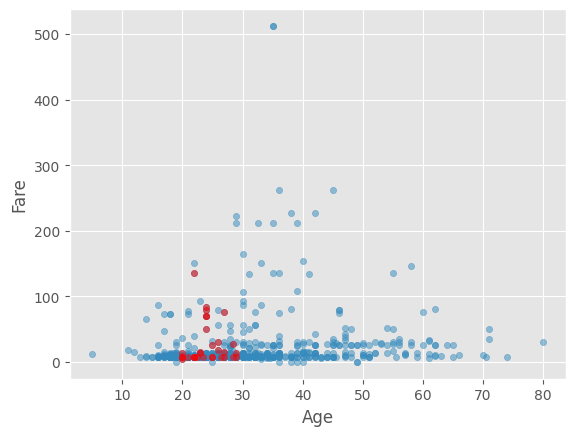

In [181]:
ax = all_df[all_df["family_num"]==0].plot.scatter(x = "Age", y = "Fare", alpha = 0.5)
C_young20.plot.scatter(x = "Age", y = "Fare", color = "red",alpha = 0.5, ax = ax)

<Axes: xlabel='Age', ylabel='Fare'>

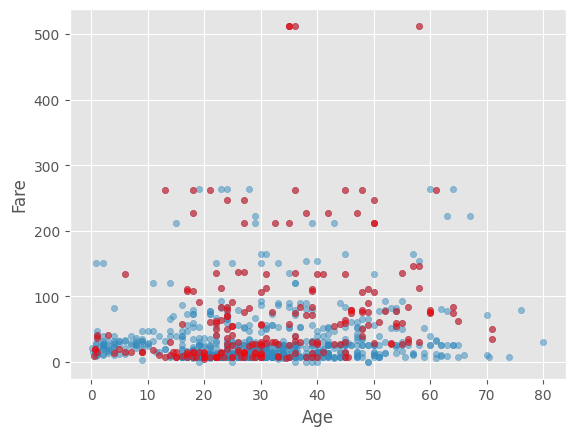

In [183]:
C_all = all_df[(all_df["Embarked"]=="C")]
ax = all_df.plot.scatter(x = "Age",y = "Fare", alpha = 0.5)
C_all.plot.scatter(x = "Age",y = "Fare",color = "red",alpha = 0.5,ax = ax)